<a href="https://colab.research.google.com/github/Shinigami-Developer/Fertile-India/blob/main/models/crop_prediction/model_creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
# if your are using local machine then use 'crop_recommendation.csv'
df = pd.read_csv('/content/crop_recommendation.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,63,54,35,20.879744,82.002744,6.502985,202.935536,rice
1,86,59,44,21.770462,80.319644,7.038096,226.655537,rice
2,92,39,39,23.004459,82.320763,7.840207,263.964248,rice
3,86,52,45,26.491096,80.158363,6.980401,242.864034,rice
4,88,51,43,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.shape

(2200, 8)

In [5]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [6]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [7]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [8]:
df['label'].value_counts()

jute           100
watermelon     100
apple          100
rice           100
mungbean       100
pomegranate    100
maize          100
banana         100
coffee         100
mothbeans      100
papaya         100
lentil         100
orange         100
chickpea       100
pigeonpeas     100
mango          100
coconut        100
cotton         100
kidneybeans    100
muskmelon      100
blackgram      100
grapes         100
Name: label, dtype: int64

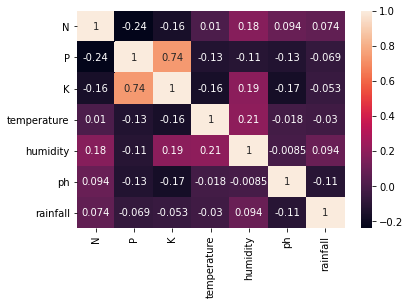

In [9]:
sns.heatmap(df.corr(),annot=True)

Seperating features and target label

In [10]:
independent = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]

dependent = df['label']

In [11]:

# Splitting into train and test data

from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(independent , dependent ,test_size = 0.2,random_state =2)

In [12]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

**Decision Tree**

In [13]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)

acc.append(x)
model.append('Decision Tree')

print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  94.31818181818183
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      0.88      0.94        17
   blackgram       0.73      1.00      0.84        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.91      0.95        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.76      1.00      0.86        28
 kidneybeans       1.00      0.79      0.88        14
      lentil       0.82      1.00      0.90        23
       maize       1.00      0.81      0.89        21
       mango       0.96      1.00      0.98        26
   mothbeans       1.00      0.74      0.85        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00

In [14]:
from sklearn.model_selection import cross_val_score

# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, independent, dependent,cv=5)

score

array([0.93863636, 0.90681818, 0.91818182, 0.90227273, 0.93636364])

**Guassian Naive Bayes**

In [15]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)

acc.append(x)
model.append('Naive Bayes')

print("Naive Bayes's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  98.86363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [16]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,independent,dependent,cv=5)
score

array([0.99318182, 0.99772727, 0.99318182, 0.99090909, 0.99090909])

**Support Vector Machine (SVM)**

In [17]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)

acc.append(x)
model.append('SVM')

print("SVM's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  12.5
              precision    recall  f1-score   support

       apple       1.00      0.54      0.70        13
      banana       1.00      0.18      0.30        17
   blackgram       1.00      0.25      0.40        16
    chickpea       1.00      0.19      0.32        21
     coconut       1.00      0.05      0.09        21
      coffee       0.00      0.00      0.00        22
      cotton       0.00      0.00      0.00        20
      grapes       1.00      0.17      0.29        18
        jute       1.00      0.04      0.07        28
 kidneybeans       0.04      1.00      0.07        14
      lentil       0.00      0.00      0.00        23
       maize       0.00      0.00      0.00        21
       mango       0.00      0.00      0.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      0.04      0.08        24
   muskmelon       1.00      0.30      0.47        23
      orange       0.00      0.00      0.00        29
  

In [18]:
# Cross validation score (SVM)
score = cross_val_score(SVM,independent,dependent,cv=5)
score

array([0.29090909, 0.27954545, 0.27272727, 0.30909091, 0.28636364])

**Logistic Regression**

In [19]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)

acc.append(x)
model.append('Logistic Regression')

print("Logistic Regression's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  96.5909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      0.95      0.95        20
      grapes       1.00      1.00      1.00        18
        jute       0.85      0.82      0.84        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       0.95      0.95      0.95        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00     

In [20]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,independent,dependent,cv=5)
score

array([0.97272727, 0.94772727, 0.95681818, 0.96590909, 0.94772727])

**Random Forest**

In [21]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)

acc.append(x)
model.append('RF')

print("RF's Accuracy is: ", x*100)
print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  98.86363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [22]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,independent,dependent,cv=5)
score

array([0.99772727, 0.99545455, 0.99318182, 0.99318182, 0.98409091])

**XGBoost**

In [23]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)

acc.append(x)
model.append('XGBoost')

print("XGBoost's Accuracy is: ", x*100)
print(classification_report(Ytest,predicted_values))

XGBoost's Accuracy is:  99.54545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.93      0.96        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      

In [24]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,independent,dependent,cv=5)
score

array([0.98636364, 0.98863636, 0.98863636, 0.98863636, 0.99090909])

**Accuracy Comparison**

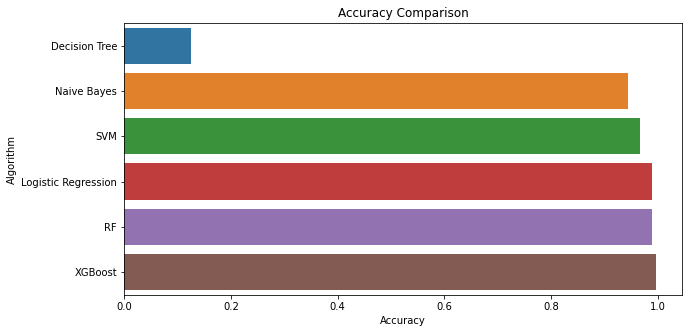

In [25]:
plt.figure(figsize=[10,5])

plt.title('Accuracy Comparison')

plt.xlabel('Accuracy')

plt.ylabel('Algorithm')

sns.barplot(x = acc,y = model , order = acc.sort())

In [26]:
# Xgboost giving High accuracy and its almost 100% acc but in some time model over fit the data
#there may be chance bayes towords training model so iam importing next best model RF 

import pickle

# Open the file to save as pkl file
RF_pkl = open('/content/RF_pkl.pkl', 'wb')

pickle.dump(RF, RF_pkl)

**Making a prediction**

In [27]:
model = pickle.load(open('/content/RF_pkl.pkl' , 'rb'))

In [28]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])

prediction = model.predict(data)

print(prediction)

['coffee']


In [29]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])

prediction = RF.predict(data)

print(prediction)

['jute']
